In [4]:
# Import all necessary libraries
import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tabulate import tabulate
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files # For downloading files in Colab

# Download necessary NLTK resources
print("Downloading NLTK resources...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added this line to download punkt_tab
print("NLTK downloads complete.")

# Download and load the spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model 'en_core_web_sm' loaded.")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'. This may take a moment...")
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model loaded.")

NLTK downloads complete.
spaCy model 'en_core_web_sm' loaded.


In [7]:
# Load the excel file
df = pd.read_excel('seeds_sentement.xlsx')
print("DataFrame Head:")
print(df.head())

# Combine all comments into a single string
text_data = ' '.join(df['Comment'].astype(str).tolist())

# --- Text Preprocessing for Word/Bigram Counting ---
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower()) # Tokenize and lower case
# Filter out stop words and non-alphabetic tokens (e.g., punctuation, numbers)
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

print(f"\nTotal filtered words: {len(filtered_words)}")

DataFrame Head:
              Customer Name  Gender  \
0       Natraj B, Bangalore       1   
1  Sandhya Rani, Bangalore        0   
2        Shovan Chakraborty       1   
3               Placeholder      -1   
4              Vinit Ranjan       1   

                                             Comment    Website  \
0                                       good quality  Bigbasket   
1  become black , bad smell , bad quality , old s...  Bigbasket   
2                                               good     Amazon   
3                                               nice     Amazon   
4  good product , nicely packed - even check auth...   Flipkart   

         Seed Type       Date  Label  \
0    Pumpkin Seeds 2024-02-12      1   
1  Sunflower Seeds 2024-06-11     -1   
2       Flax Seeds 2023-08-10      0   
3    Seasame Seeds 2024-06-30      1   
4    Pumpkin Seeds 2024-01-29      1   

                                           Comment.1  Sentiment  
0                                      

In [9]:
# --- 3a. Top 10 Words ---
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)

print("\nTop 10 words:")
top_words_table = tabulate(top_10_words, headers=['Word', 'Count'], tablefmt='grid')
print(top_words_table)

# Save and download Top Words table
output_filename_words = 'top_10_words.txt'
with open(output_filename_words, 'w', encoding='utf-8') as f:
    f.write("Top 10 words:\n")
    f.write(top_words_table)
files.download(output_filename_words)

# --- 3b. Top 10 Bigrams ---
from nltk.util import ngrams # Import ngrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)

# Format the bigrams for printing and saving
printable_bigrams = [(' '.join(bigram), count) for bigram, count in top_10_bigrams]

print("\nTop 10 Bigrams:")
bigrams_table = tabulate(printable_bigrams, headers=['Bigram', 'Count'], tablefmt='grid')
print(bigrams_table)

# Save and download Top Bigrams table
output_filename_bigrams = 'top_10_bigrams.txt'
with open(output_filename_bigrams, 'w', encoding='utf-8') as f:
    f.write("Top 10 Bigrams:\n")
    f.write(bigrams_table)
files.download(output_filename_bigrams)


Top 10 words:
+---------+---------+
| Word    |   Count |
+=========+=========+
| good    |    1469 |
+---------+---------+
| product |     902 |
+---------+---------+
| quality |     740 |
+---------+---------+
| seed    |     707 |
+---------+---------+
| nice    |     286 |
+---------+---------+
| taste   |     260 |
+---------+---------+
| fresh   |     175 |
+---------+---------+
| like    |     148 |
+---------+---------+
| chia    |     139 |
+---------+---------+
| buy     |     132 |
+---------+---------+


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Top 10 Bigrams:
+-----------------+---------+
| Bigram          |   Count |
+=================+=========+
| good quality    |     294 |
+-----------------+---------+
| good product    |     242 |
+-----------------+---------+
| product good    |     177 |
+-----------------+---------+
| quality good    |     166 |
+-----------------+---------+
| good good       |     165 |
+-----------------+---------+
| chia seed       |     128 |
+-----------------+---------+
| nice product    |      84 |
+-----------------+---------+
| quality product |      81 |
+-----------------+---------+
| seed good       |      80 |
+-----------------+---------+
| flax seed       |      75 |
+-----------------+---------+


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

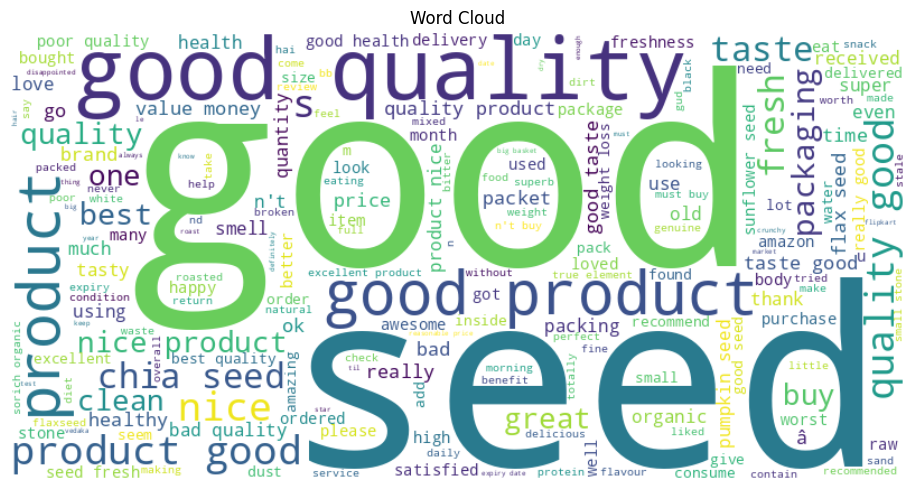

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# --- Generate and Display Word Cloud ---
filename_wc = 'wordcloud.png'

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(text_data)

# Display and save the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.tight_layout()

plt.savefig(filename_wc)
plt.show()

# Download
print(f"Downloading {filename_wc}...")
files.download(filename_wc)


Named Entities:
+-----------------------------------+----------+
| Entity                            | Label    |
+===================================+==========+
| oven â€                           | PERSON   |
+-----------------------------------+----------+
| mentio ed                         | PERSON   |
+-----------------------------------+----------+
| first 3 month                     | DATE     |
+-----------------------------------+----------+
| 7                                 | CARDINAL |
+-----------------------------------+----------+
| 3 month                           | DATE     |
+-----------------------------------+----------+
| 6th month                         | DATE     |
+-----------------------------------+----------+
| first                             | ORDINAL  |
+-----------------------------------+----------+
| first                             | ORDINAL  |
+-----------------------------------+----------+
| â€                                | ORG      |
+--

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-1925691041.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipython-input-1925691041.py:49: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.savefig(filename_kg)
/tmp/ipython-input-1925691041.py:49: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  plt.savefig(filename_kg)
/tmp/ipython-input-1925691041.py:49: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  plt.savefig(filename_kg)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyp

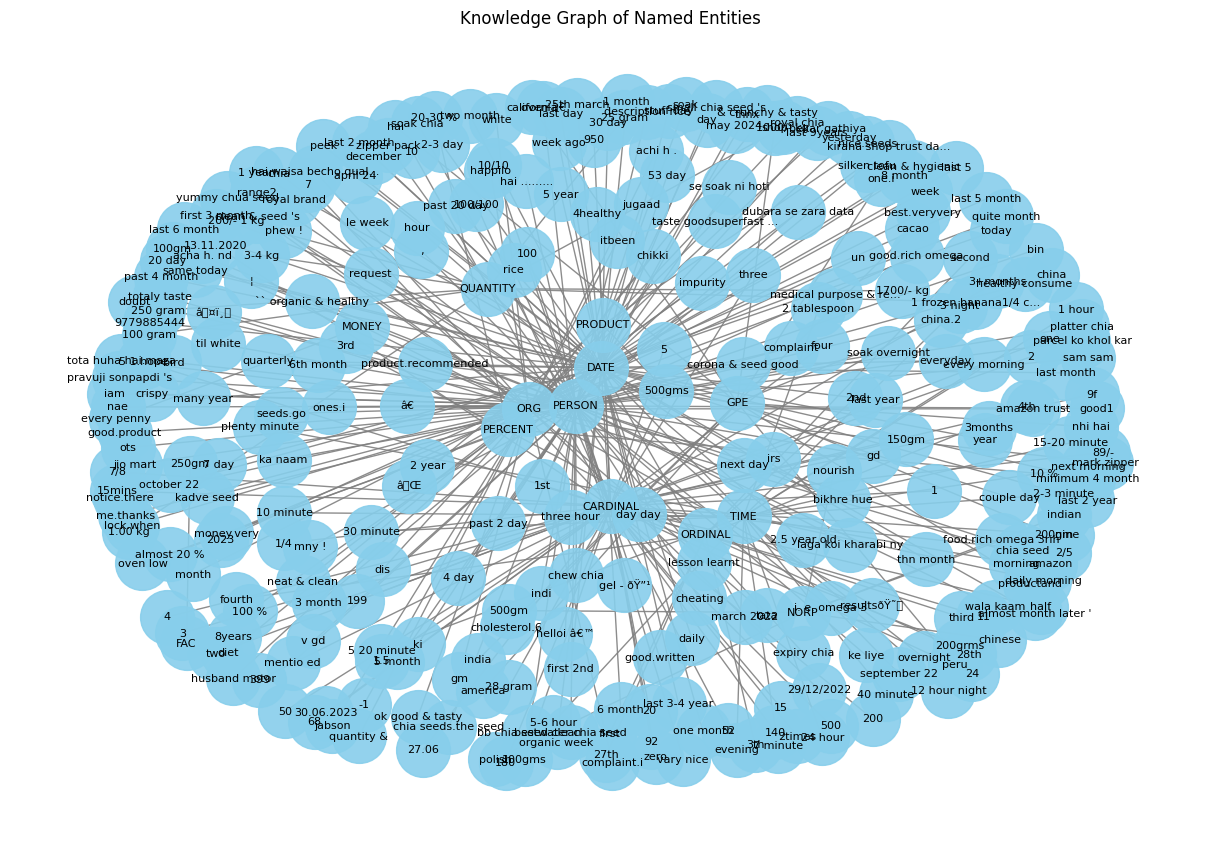

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# --- 5a. Named Entity Recognition (NER) ---
doc = nlp(text_data)

# Extract named entities
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print the named entities in a table format
print("\nNamed Entities:")
ner_table = tabulate(named_entities, headers=['Entity', 'Label'], tablefmt='grid')
print(ner_table)

# Save and download NER table
output_filename_ner = 'named_entities.txt'
with open(output_filename_ner, 'w', encoding='utf-8') as f:
    f.write("Named Entities:\n")
    f.write(ner_table)
files.download(output_filename_ner)


# --- 5b. Knowledge Graph Visualization ---
filename_kg = 'knowledge_graph.png'

# Create edges based on entities (simple approach: Entity -> Label)
edges = []
for ent in doc.ents:
    # Use a maximum length to keep graph nodes readable
    entity_text = ent.text[:20] + '...' if len(ent.text) > 20 else ent.text
    edges.append((entity_text, ent.label_))

# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Draw the knowledge graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, k=0.5, seed=42) # Adjust 'k' for spacing, set seed for reproducibility

# Draw nodes and edges
nx.draw(graph, pos, with_labels=False, node_color='skyblue', node_size=1500, alpha=0.9, edge_color='gray')

# Draw labels with an offset
labels = {node: node for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos, labels, font_size=8, font_color='black', verticalalignment='center')

plt.title('Knowledge Graph of Named Entities')
plt.axis('off')
plt.tight_layout()

plt.savefig(filename_kg)
plt.show()

# Download
print(f"Downloading {filename_kg}...")
files.download(filename_kg)

In [12]:
# --- TF-IDF Matrix Calculation ---
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Comment'].astype(str))

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                        columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix Head:")
print(tfidf_df.head())

# --- Save and Download TF-IDF Matrix (as CSV for large data) ---
output_filename_tfidf = 'tfidf_matrix.csv'

# Save only the top 100 features/rows to keep the file size manageable for download demonstration
# If you need the full matrix, remove the .iloc[] slicing
tfidf_df_sample = tfidf_df.head(50)
tfidf_df_sample.to_csv(output_filename_tfidf, index=False)

print(f"\nSaved a sample of the TF-IDF matrix to {output_filename_tfidf}")
files.download(output_filename_tfidf)


TF-IDF Matrix Head:
    00   06   10  100  1000  100g  100gm  100gms   11   12  ...  zyada   ¹à  \
0  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...    0.0  0.0   
1  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...    0.0  0.0   
2  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...    0.0  0.0   
3  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...    0.0  0.0   
4  0.0  0.0  0.0  0.0   0.0   0.0    0.0     0.0  0.0  0.0  ...    0.0  0.0   

    ¾à   â½   âœ   ðÿ  ðÿœ   šà  šðÿ   ˆà  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 2248 columns]

Saved a sample of the TF-IDF matrix to tfidf_matrix.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>